In [3]:
import random
import matplotlib.pyplot as plt
import math

In [5]:
#3.1
def count_dice_sum(x: int, n: int = 10, m: int = 6, progress: bool = False) -> int:
    """
    计算 n 个 m 面骰子掷出总和为 x 的所有可能组合数。

    参数：
        x: 目标总和
        n: 骰子个数（默认 10）
        m: 骰子面数（默认 6）
        progress: 是否显示进度信息（默认 False）
    返回：
        组合数（int）
    """
    # -------- 输入校验与边界剪枝 --------
    min_sum = n * 1        # 最小可能总和：每个骰子都为 1
    max_sum = n * m        # 最大可能总和：每个骰子都为 m
    if x < min_sum or x > max_sum:
        # 如果目标总和超出范围，直接返回 0
        return 0
    if n <= 0 or m <= 0:
        # 骰子个数和面数必须为正整数
        raise ValueError("n 和 m 必须为正整数")
    # -------- 初始化 DP 数组 --------
    # dp[s] 表示当前骰子数下，总和为 s 的组合方式数
    dp = [0] * (max_sum + 1)
    # 初始情况：只有 1 个骰子时，总和为 1..m 的方式数均为 1
    for face in range(1, m + 1):
        dp[face] = 1
    # -------- 动态规划迭代（卷积思想） --------
    # 每次增加一个骰子，相当于把上一层分布与 [1..m] 做卷积
    for k in range(2, n + 1):
        new_dp = [0] * (max_sum + 1)
        # 当前层的总和范围是 [k, k*m]
        start = k
        end = k * m
        # 遍历所有可能的总和
        for s in range(start, end + 1):
            total = 0
            # 剪枝：只考虑上一层有效区间 [ (k-1), (k-1)*m ]
            low = max(1, s - m)                # 最小可能来源
            high = min((k - 1) * m, s - 1)     # 最大可能来源
            # 累加所有可能来源的方式数
            for t in range(low, high + 1):
                total += dp[t]
            new_dp[s] = total
        dp = new_dp  # 更新为当前层结果
        # 可选进度显示
        if progress:
            done = (k - 1) / (n - 1) if n > 1 else 1.0
            print(f"进度：{done:.0%}（已卷积到 {k} 个骰子）")
    # -------- 返回结果 --------
    return dp[x]
if __name__ == "__main__":
    x = 35
    # 计算 10 个 6 面骰子总和为 45 的组合数
    ways = count_dice_sum(x, n=10, m=6, progress=True)
    print(f"10个6面骰子总和为{x}的方式数：{ways}")

进度：11%（已卷积到 2 个骰子）
进度：22%（已卷积到 3 个骰子）
进度：33%（已卷积到 4 个骰子）
进度：44%（已卷积到 5 个骰子）
进度：56%（已卷积到 6 个骰子）
进度：67%（已卷积到 7 个骰子）
进度：78%（已卷积到 8 个骰子）
进度：89%（已卷积到 9 个骰子）
进度：100%（已卷积到 10 个骰子）
10个6面骰子总和为35的方式数：4395456


In [2]:
#3.2
def dice_distribution(n: int = 10, m: int = 6):
    """
    计算 n 个 m 面骰子的所有可能总和分布。
    返回一个列表 dist，其中 dist[s] 表示总和为 s 的组合数。
    """
    # 最大可能总和：n 个骰子，每个最大值为 m
    max_sum = n * m
    # dp[s] 表示当前骰子数下，总和为 s 的组合方式数
    dp = [0] * (max_sum + 1)
    # 初始化：一个骰子时，总和为 1..m 的方式数均为 1
    for face in range(1, m + 1):
        dp[face] = 1
    # 动态规划迭代：逐步增加骰子数量
    for k in range(2, n + 1):
        # new_dp 用来存储当前 k 个骰子的分布
        new_dp = [0] * (max_sum + 1)
        # 构建前缀和数组 prefix[s] = sum(dp[0..s])
        # 用于快速计算区间和，避免重复累加
        prefix = [0] * (max_sum + 1)
        running = 0
        for s in range(max_sum + 1):
            running += dp[s]
            prefix[s] = running
        # 当前层的总和范围是 [k, k*m]
        for s in range(k, k * m + 1):
            # new_dp[s] = sum(dp[s-m .. s-1])
            # 即在上一层分布中，所有可能来源的组合数之和
            low = max(0, s - m)   # 区间下界
            high = s - 1          # 区间上界
            # 使用前缀和快速计算区间和
            new_dp[s] = prefix[high] - (prefix[low - 1] if low > 0 else 0)
        # 更新 dp 为当前层结果
        dp = new_dp
    # 返回最终分布数组
    return dp
if __name__ == "__main__":
    # 计算 10 个 6 面骰子的分布
    dist = dice_distribution(n=10, m=6)
    # 提取 10~60 的组合数（因为最小和是 10，最大和是 60）
    Number_of_ways = dist[10:61]
    # 找出组合数最多的那个总和
    max_ways = max(Number_of_ways)                  # 最大的组合数
    max_x = Number_of_ways.index(max_ways) + 10     # 对应的总和（偏移量 +10）
    # 打印每个总和对应的组合数
    print("每个总和对应的组合数：")
    for x, ways in enumerate(Number_of_ways, start=10):
        print(f"Sum = {x}, Ways = {ways}")
    # 打印出现最多组合数的总和
    print(f"\nMaximum number of ways occurs at x = {max_x}, ways = {max_ways}")

每个总和对应的组合数：
Sum = 10, Ways = 1
Sum = 11, Ways = 10
Sum = 12, Ways = 55
Sum = 13, Ways = 220
Sum = 14, Ways = 715
Sum = 15, Ways = 2002
Sum = 16, Ways = 4995
Sum = 17, Ways = 11340
Sum = 18, Ways = 23760
Sum = 19, Ways = 46420
Sum = 20, Ways = 85228
Sum = 21, Ways = 147940
Sum = 22, Ways = 243925
Sum = 23, Ways = 383470
Sum = 24, Ways = 576565
Sum = 25, Ways = 831204
Sum = 26, Ways = 1151370
Sum = 27, Ways = 1535040
Sum = 28, Ways = 1972630
Sum = 29, Ways = 2446300
Sum = 30, Ways = 2930455
Sum = 31, Ways = 3393610
Sum = 32, Ways = 3801535
Sum = 33, Ways = 4121260
Sum = 34, Ways = 4325310
Sum = 35, Ways = 4395456
Sum = 36, Ways = 4325310
Sum = 37, Ways = 4121260
Sum = 38, Ways = 3801535
Sum = 39, Ways = 3393610
Sum = 40, Ways = 2930455
Sum = 41, Ways = 2446300
Sum = 42, Ways = 1972630
Sum = 43, Ways = 1535040
Sum = 44, Ways = 1151370
Sum = 45, Ways = 831204
Sum = 46, Ways = 576565
Sum = 47, Ways = 383470
Sum = 48, Ways = 243925
Sum = 49, Ways = 147940
Sum = 50, Ways = 85228
Sum = 51, Way

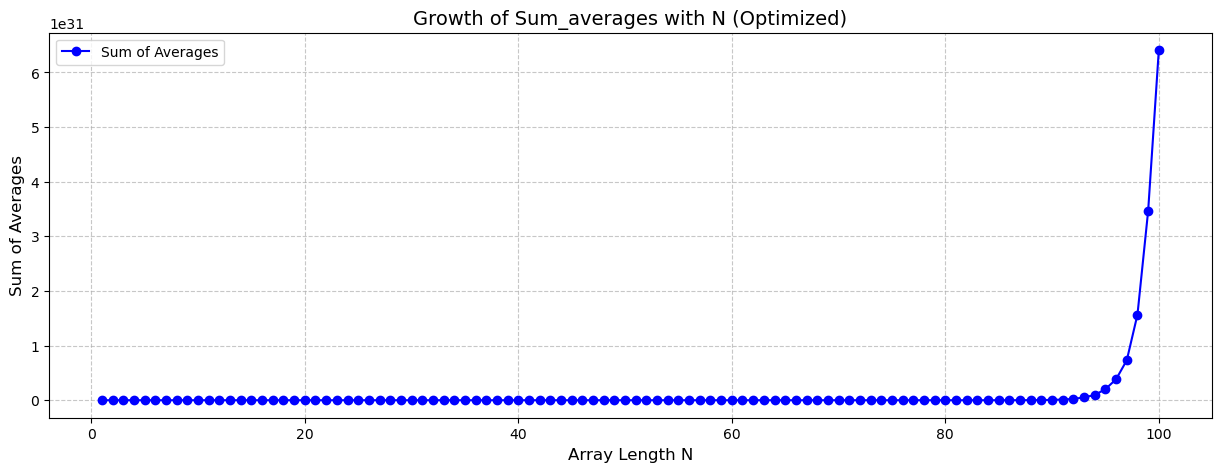

In [6]:
#4.3
# 函数：生成一个长度为 N 的随机整数数组
# 每个元素在 1 到 100 之间随机选取
def Random_integer(N):
    return [random.randint(1, 100) for _ in range(N)]
# 计算所有非空子集平均值之和
def Sum_averages(arr):
    N = len(arr)   # 数组长度
    total = 0      # 初始化总和
    # 遍历数组中的每个元素
    for i in range(N):
        # 遍历所有可能的子集大小（1 到 N）
        for size in range(1, N+1):
            # 该元素在大小为 size 的子集中的出现次数
            # 公式：C(N-1, size-1)，即从剩余 N-1 个元素中选出 size-1 个
            count = math.comb(N-1, size-1)
            # 平均值贡献：元素值 * 出现次数 / 子集大小
            total += arr[i] * count / size
    return total
# 存储每个 N 对应的结果
Total_sum_averages = []
# 从 N = 1 到 N = 100，逐步生成数组并计算 Sum_averages
for N in range(1, 101):
    arr = Random_integer(N)       # 生成长度为 N 的随机数组
    total = Sum_averages(arr)     # 计算该数组的所有子集平均值之和
    Total_sum_averages.append(total)  # 保存结果
# 绘制趋势图
plt.figure(figsize=(15,5))
plt.plot(range(1, 101), Total_sum_averages, 
         marker='o', linestyle='-', color='b', label="Sum of Averages")  # 绘制折线图
plt.xlabel("Array Length N", fontsize=12)   # 设置 X 轴标签
plt.ylabel("Sum of Averages", fontsize=12)  # 设置 Y 轴标签
plt.title("Growth of Sum_averages with N (Optimized)", fontsize=14)  # 设置标题
plt.grid(True, linestyle='--', alpha=0.7)   # 添加网格线，增强可读性
plt.legend()                                # 显示图例
plt.show()                                  # 显示图像